In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data/train.csv')
data.head()

In [4]:
data = np.array(data)
np.random.shuffle(data) 
m, n = data.shape# shuffle before splitting 

data_test = data[0:1000].T
data_train = data[1000:m].T

Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

_, m_train = X_train.shape

In [5]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def derivated_ReLU(Z):
    return Z > 0

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2
    
def prop_forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def prop_backward(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - one_hot_encode(Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * derivated_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = prop_forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = prop_backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 25 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 2 1 ... 5 0 9] [4 6 2 ... 3 3 7]
0.09565853658536586
Iteration:  10
[4 2 1 ... 2 7 9] [4 6 2 ... 3 3 7]
0.17102439024390245
Iteration:  20
[4 2 1 ... 2 7 9] [4 6 2 ... 3 3 7]
0.2216829268292683
Iteration:  30
[4 2 1 ... 2 7 9] [4 6 2 ... 3 3 7]
0.2732439024390244
Iteration:  40
[4 2 1 ... 2 7 9] [4 6 2 ... 3 3 7]
0.32709756097560977
Iteration:  50
[4 2 1 ... 2 7 7] [4 6 2 ... 3 3 7]
0.3751707317073171
Iteration:  60
[4 2 1 ... 2 7 7] [4 6 2 ... 3 3 7]
0.43397560975609756
Iteration:  70
[4 2 1 ... 2 7 7] [4 6 2 ... 3 3 7]
0.4786341463414634
Iteration:  80
[4 2 1 ... 0 7 7] [4 6 2 ... 3 3 7]
0.5133170731707317
Iteration:  90
[4 2 8 ... 0 7 7] [4 6 2 ... 3 3 7]
0.5433414634146342
Iteration:  100
[4 6 8 ... 3 7 7] [4 6 2 ... 3 3 7]
0.5707560975609756
Iteration:  110
[4 6 8 ... 3 7 7] [4 6 2 ... 3 3 7]
0.5955853658536585
Iteration:  120
[4 6 6 ... 3 7 7] [4 6 2 ... 3 3 7]
0.6170975609756097
Iteration:  130
[4 6 6 ... 3 7 7] [4 6 2 ... 3 3 7]
0.6370731707317073
Iteration:  1

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = prop_forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_img = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_img = current_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  9


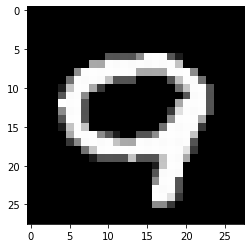

In [13]:
test_prediction(46, W1, b1, W2, b2)

In [14]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[2 5 8 1 3 0 6 9 9 4 9 3 0 2 3 5 9 2 9 5 4 6 9 5 2 6 7 1 9 6 3 7 6 0 4 4 1
 7 7 4 3 3 9 9 3 8 1 1 5 1 8 3 1 8 8 0 5 6 4 6 0 2 3 6 4 9 6 6 2 8 8 1 7 2
 7 6 5 2 7 5 7 1 1 3 7 7 5 3 9 3 4 1 0 5 7 8 1 3 0 2 0 4 1 4 9 7 6 5 5 1 6
 8 7 9 1 0 6 7 7 7 5 0 7 2 4 4 8 9 4 9 5 4 7 4 9 2 9 5 1 8 1 7 1 6 2 4 2 9
 8 9 3 6 6 9 1 1 3 3 6 8 8 7 4 2 8 0 3 4 5 4 4 2 2 0 6 3 5 0 2 4 9 7 8 4 5
 2 0 8 9 4 5 3 9 9 4 4 8 1 5 8 1 7 0 0 7 8 9 5 1 1 7 3 1 2 9 3 5 3 2 8 1 5
 3 1 6 9 2 3 0 2 6 2 1 0 5 1 1 2 9 3 0 6 8 0 6 6 7 8 9 3 7 8 9 8 9 8 1 5 0
 0 8 1 6 7 3 3 5 5 1 5 7 4 1 1 0 6 9 8 1 3 7 1 9 4 0 9 8 8 6 5 6 6 4 0 2 1
 2 4 4 6 5 3 1 1 3 3 5 7 5 4 9 9 0 4 6 9 0 1 9 2 2 1 9 4 9 9 2 8 4 3 1 1 1
 8 8 4 0 1 2 9 3 8 5 0 7 3 7 7 9 6 8 4 4 3 7 2 9 2 0 6 7 8 5 6 3 0 4 6 0 3
 0 2 8 4 9 8 2 0 4 9 0 5 7 0 4 0 6 5 1 7 1 6 2 7 6 5 9 6 9 6 1 5 5 9 9 6 7
 5 0 6 9 9 6 0 9 4 1 3 1 7 2 6 1 7 4 2 5 1 1 4 1 1 0 3 3 7 7 9 4 3 6 8 0 0
 5 3 2 8 2 0 1 1 4 3 2 3 8 2 4 7 7 1 9 2 3 3 1 1 3 4 6 4 1 1 4 2 1 7 7 2 9
 4 8 9 4 9 3 5 1 4 4 3 1 

0.836